# **Step 1: Selecting and describing a dataset**

I will be utilizing a dataset with Heart Disease information from UCI (available at https://archive.ics.uci.edu/dataset/45/heart+disease). This dataset was originally compiled from studies conducted between 1988 and the early 1990s and represents a combination of four databases with data collected from the following locations:

1.	Cleveland Clinic Foundation (Cleveland, Ohio, USA)
2.	Hungarian Institute of Cardiology (Budapest, Hungary)
3.	V.A. Medical Center (Long Beach, California, USA)
4.	University Hospital (Zurich, Switzerland)

While the full dataset contains 76 attributes, only 14 of these have been used in research studies. These 14 attributes were chosen for their clinical relevance and widespread use in previous experiments. The Cleveland database is the only one that has been extensively used by machine learning researchers and is also the focus of this project. The file, `processed.cleveland.data`, contains the Cleveland database, with attributes formatted for research purposes. The data was collected to assess factors contributing to heart disease and evaluate diagnostic models.

## **The population being studied?**

The population comprises patients from Cleveland, Ohio in the United States who underwent medical examinations at the Cleveland Clinic Foundation to evaluate their cardiovascular health. The dataset includes individuals with and without diagnosed heart disease, spanning a wide age range (29–77 years) and 2 genders (Male and Female). It is designed to assess factors contributing to heart disease, such as vital signs, clinical measures, and physiological responses.

The “goal” field in the dataset indicates the angiographic disease status (a major blood vessel that is more than 50% narrowed in diameter) which is an indicator of heart disease, categorized into five values:  
0: No heart disease / < 50% diameter narrowing in a major blood vessel  
1, 2, 3, 4: Various levels of heart disease severity / >50% diameter narrowing in a major blood vessel  

Experiments using this dataset focus on distinguishing between the presence (1–4) and absence (0) of heart disease. The dataset is anonymized, with identifiers such as names and social security numbers replaced by dummy values.

## **The sample size?**

The Cleveland database I am using contains 303 observations, with each row representing an individual patient’s record containing 14 variables.

## **Dependent and independent variables in the dataset?**

In this dataset, there are 11 independent variables and 3 dependent variables

**Independent Variables:** 
- Age - Patient’s age (numerical, continuous)  
- Sex - Gender of the patient (categorical, binary: 0 = Female, 1 = Male)  
- Chest Pain Type (cp) - (categorical, ordinal: Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)  
- Resting Blood Pressure (trestbps) - Resting blood pressure in mmHg (numerical, continuous)  
- Serum Cholesterol (chol) - Serum cholesterol in mg/dL (numerical, continuous)  
- Fasting Blood Sugar (fbs) - whether fasting blood sugar is > 120 mg/dL (categorical, binary: 0 = No, 1 = Yes)  
- Resting Electrocardiographic Results (restecg) - Results of resting ECG (categorical, ordinal: 0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy)  
- Exercise-Induced Angina (exang) - Angina induced by exercise (categorical, binary: 0 = No, 1 = Yes)  
- Slope of the Peak Exercise ST Segment (slope) - Slope of the ST segment during peak exercise (categorical, ordinal: 1 = Upsloping, 2 = Flat, 3 = Downsloping)  
- Number of Major Vessels Colored by Fluoroscopy (ca) - Number of major vessels (0–3) visible on fluoroscopy (numerical, discrete)  
- Thalassemia (thal) - Type of thalassemia (categorical, ordinal: 3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)  

**Dependent Variables:** 
- Heart Disease Presence (goal) - Dependent because it is the primary outcome indicating whether the patient has heart disease or not. It is influenced by risk factors like age and cholesterol (numerical, ordinal: 0–4 but simplified to binary 0 and 1)  
- Maximum Heart Rate Achieved (thalach) - Dependent because it reflects the physiological response to exercise, which is influenced by factors such as age, blood pressure, and exercise-induced angina (numerical, continuous)  
- ST Depression Induced by Exercise (oldpeak), measured in mm - This outcome depends on the heart’s ability to handle stress - (numerical, continuous)  

## **Which specific variables I am focusing on for my project, and whether each of these is numerical or categorical, continuous or discrete, nominal or ordinal?**
For my project the specific variables I am focusing on will be Age, Sex, Serum Cholesterol, Heart Disease Presence, and ST Depression Induced by Exercise.

- Age: Independent Variable, numerical, Continuous
- Sex: Independent Variable, Categorical, Nominal
- Serum Cholesterol (chol): Independent Variable, Numerical, Continuous
- Heart Disease Presence (goal): Dependent Variable, Categorical, Nominal
- ST Depression Induced by Exercise (Oldpeak): Dependent variable, Numerical, Continuous

## **What Preprocessing/Cleaning Has Been Done?**
In terms of preprocessing, I tested below if there were any values that were missing, NA, or not numerical. The findings revealed that none of the variables I am interested in using are missing, NA, or non-Numerical. Due to this I will not be filtering out any individuals from the data and I will use all 303 patients in the dataset. There are missing values in the dataset, specifically for 2 variables; # of Major Vessels Coloured by Fluoroscopy (ca), and Thalassemia (thal). See below for how these were found...

# Load Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import mannwhitneyu

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import scale

# Importing and Examining the Dataframe

In [2]:
# Define column names
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 
    'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'goal'
]

# Import dataset w/ column names
df = pd.read_csv('processed.cleveland.data', header=None, names=columns)

# Display the first (and last) few rows
df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


# Preprocessing/Cleaning Dataframe (Checking, missing, NA, or non-numeric values)

In [3]:
# Replace '?' and '' with NaN
df.replace(['?', ''], np.nan, inplace=True)

# Check for null/invalid entries
missing_or_invalid = df.isnull().sum()

print(missing_or_invalid)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
goal        0
dtype: int64


# Step 2: Developing a Research Question

## **Hypothesis 1: Is there a significant difference in ST Depression Induced by Exercise (oldpeak) in Males vs Females?**

The ST segment is the portion of an electrocardiogram (ECG) tracing between the end of the “S” wave and the start of the “T” wave (https://www.medicalnewstoday.com/articles/st-segment-depression). In healthy individuals, this segment appears near the baseline. However, a depressed or elevated ST segment can indicate underlying cardiovascular conditions, such as myocardial ischemia or coronary artery disease. This dataset includes the degree of ST depression induced by exercise (referred to as “oldpeak”), a measurable indicator of stress-induced changes in cardiac function.

Sex-specific differences are well-documented in heart disease presentation, risk factors, and physiological responses to exercise. Investigating whether males and females differ significantly in ST depression levels during exercise can provide insights into how heart disease manifests differently between sexes and potentially inform tailored diagnostic approaches. This hypothesis is measurable and realistic, aligning with existing knowledge of cardiovascular physiology.

Variables Involved:
- Dependent Variable: ST Depression Induced by Exercise (oldpeak) (Numerical, Continuous)
- Independent Variable: Sex (Categorical, Binary: 0 = Female, 1 = Male)

Statistical Method:
- A two-sample t-test / Mann-Whitney U test (if assumptions of normality are not met) will be used to compare the distributions of oldpeak between males and females.
- Null Hypothesis: There is no significant difference in ST Depression Induced by Exercise (oldpeak) between males and females.
- Alternative Hypothesis: There is a significant difference in ST Depression Induced by Exercise (oldpeak) between males and females.

## **Hypothesis 2: Can age and serum cholesterol predict the presence of heart disease?**

Age is already a well established risk factor heart disease. Older age is known to be associated with increased risk factors for heart disease making it a suitable metric for a classification problem. Serum cholesterol tends to be a risk factor for atherosclerosis which commonly leads to heart disease, also making it a suitable metric for a classification problem. This hypothesis aims to evaluate whether age and serum cholesterol levels are good predictors for the presence of heart disease.

Variables Involved:
- Dependent Variable: Heart Disease Presence (target) (Categorical, Binary: 0 = No Heart Disease, 1 = Heart Disease Present)
- Independent Variables: Age (Numerical, Continuous), Serum Cholesterol (Numerical, Continuous)

Statistical Method:
- A logistic regression classification model will be used to assess whether age and serum cholesterol can predict the likelihood of heart disease. We will utilize the AUC-ROC value to evaluate the model’s performance, where a higher AUC indicates better discriminatory ability to distinguish between individuals with and without heart disease.

# Step 3: Explore, visualize, and criticize dataset

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,goal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Categorical Variables Exploration (Sex and Heart Disease Presence)

The plots below show the counts of the categorical variables I am using in my analysis. Again there are 303 total individuals in this dataset.

Sex is a binary categorical variable with possible values being either Female (0) or Male (1). There are 97 females and 206 males in the dataset. 

The second categorical variable I am using is Heart disease presence/angiographic disease status. In the dataset this variable actually takes on the values 0 through 4 however as mentioned above experiments using this dataset focus on distinguishing between the presence (1–4) and absence (0) of heart disease which is how I will be categorizing this variable. There are 164 individuals without heart disease and 139 individuals with heart disease in this dataset.

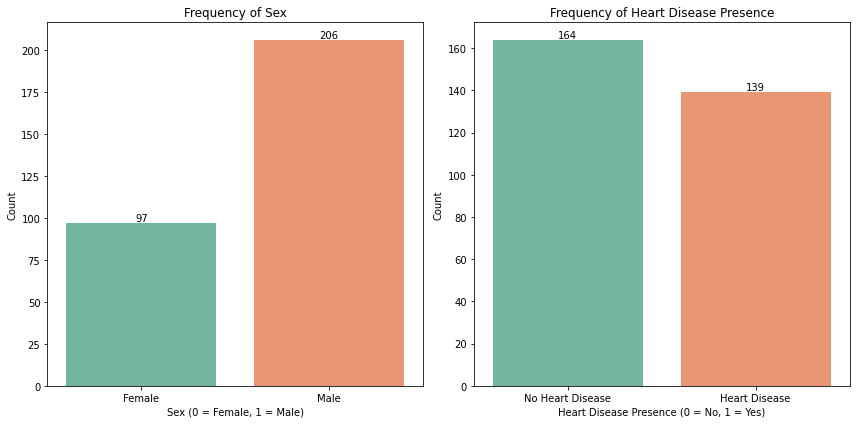

In [128]:
# Recode 'goal' into binary heart disease presence (0 = No Heart Disease, 1 = Heart Disease Present)
df['heart_disease'] = df['goal'].apply(lambda x: 0 if x == 0 else 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Barplot of Sex Counts
ax = sns.countplot(ax=axes[0], x='sex', hue='sex', data=df, palette={0: '#66c2a5', 1: '#fc8d62'}, dodge=False, legend=False)
axes[0].set_title('Frequency of Sex')
axes[0].set_xlabel('Sex (0 = Female, 1 = Male)')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Female', 'Male'])

# annotate count on plots
for p in ax.patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Barplot of Heart Disease Presence Counts
ax = sns.countplot(ax=axes[1], x='heart_disease', hue='heart_disease', data=df, palette={0: '#66c2a5', 1: '#fc8d62'}, dodge=False, legend=False)
axes[1].set_title('Frequency of Heart Disease Presence')
axes[1].set_xlabel('Heart Disease Presence (0 = No, 1 = Yes)')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Heart Disease', 'Heart Disease'])

# annotate count on plots
for p in ax.patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

## Numerical Variables Exploration (Age, Serum Cholesterol, ST Depression Induced by Exercise)

The plots below show the distributions of the numerical variables I am using in my analysis. 

The mean age of the individuals in this dataset is approximately 54 with a standard deviation of 9.04. The median age of the individuals in this dataset is 56.
- The distribution for this variable does not follow a normal distribution. It is slightly left-skewed with most values being between 55 and 65.

The mean serum cholesterol measured in mg/dl is approximately 246 mg/dl with a standard deviation of 241. The median serum cholesteral level of individuals in this dataset is 241
- The distribution for this variable does not follow a normal distribution. It is right-skewed with most values being between 200 and 300.

The mean ST depression Induced by exercise in mm is approximately 1mm with a standard deviation of 1.16. The median ST depression induced by exercise is 0.8.
- The distribution for this variable does not follow a normal distribution. It is right-skewed with most values being between 0 and 1.

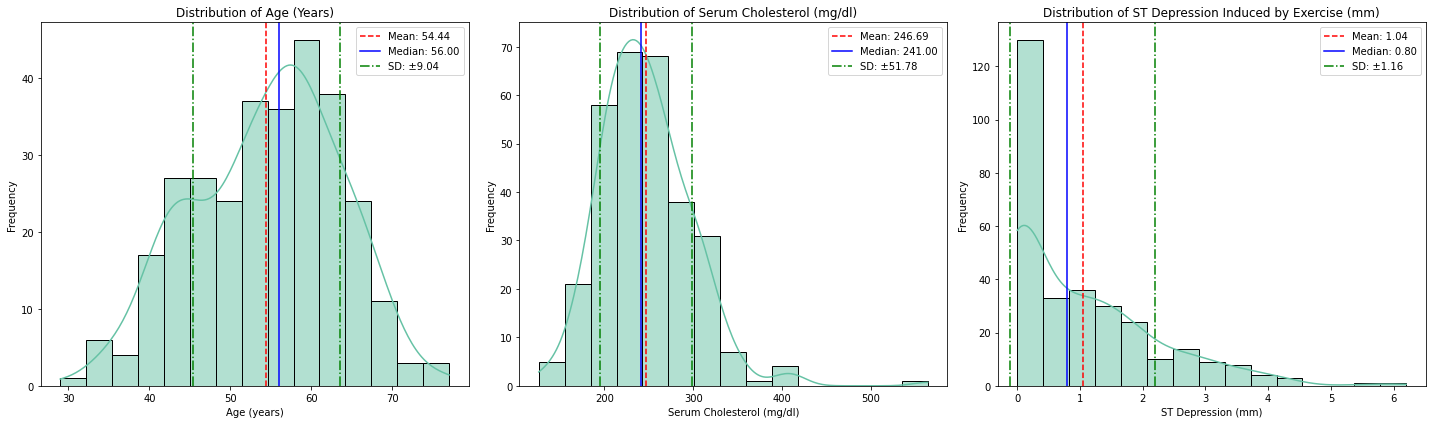

In [101]:
# color mapping for categorical variables
color_mapping = {0: '#66c2a5', 1: '#fc8d62'} 

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Distribution of Age
sns.histplot(df['age'], kde=True, bins=15, color=color_mapping[0], ax=axes[0])
axes[0].set_title('Distribution of Age (Years)')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')

mean_age = df['age'].mean()
median_age = df['age'].median()
std_age = df['age'].std()

axes[0].axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.2f}')
axes[0].axvline(median_age, color='blue', linestyle='-', label=f'Median: {median_age:.2f}')
axes[0].axvline(mean_age - std_age, color='green', linestyle='-.', label=f'SD: ±{std_age:.2f}')
axes[0].axvline(mean_age + std_age, color='green', linestyle='-.')
axes[0].legend()

# Distribution of Serum Cholesterol
sns.histplot(df['chol'], kde=True, bins=15, color=color_mapping[0], ax=axes[1])
axes[1].set_title('Distribution of Serum Cholesterol (mg/dl)')
axes[1].set_xlabel('Serum Cholesterol (mg/dl)')
axes[1].set_ylabel('Frequency')

mean_chol = df['chol'].mean()
median_chol = df['chol'].median()
std_chol = df['chol'].std()

axes[1].axvline(mean_chol, color='red', linestyle='--', label=f'Mean: {mean_chol:.2f}')
axes[1].axvline(median_chol, color='blue', linestyle='-', label=f'Median: {median_chol:.2f}')
axes[1].axvline(mean_chol - std_chol, color='green', linestyle='-.', label=f'SD: ±{std_chol:.2f}')
axes[1].axvline(mean_chol + std_chol, color='green', linestyle='-.')
axes[1].legend()

# Distribution of ST Depression Induced by Exercise
sns.histplot(df['oldpeak'], kde=True, bins=15, color=color_mapping[0], ax=axes[2])
axes[2].set_title('Distribution of ST Depression Induced by Exercise (mm)')
axes[2].set_xlabel('ST Depression (mm)')
axes[2].set_ylabel('Frequency')

mean_oldpeak = df['oldpeak'].mean()
median_oldpeak = df['oldpeak'].median()
std_oldpeak = df['oldpeak'].std()

axes[2].axvline(mean_oldpeak, color='red', linestyle='--', label=f'Mean: {mean_oldpeak:.2f}')
axes[2].axvline(median_oldpeak, color='blue', linestyle='-', label=f'Median: {median_oldpeak:.2f}')
axes[2].axvline(mean_oldpeak - std_oldpeak, color='green', linestyle='-.', label=f'SD: ±{std_oldpeak:.2f}')
axes[2].axvline(mean_oldpeak + std_oldpeak, color='green', linestyle='-.')
axes[2].legend()

plt.tight_layout()
plt.show()


## Additional Exploratory Plots

The plots below show some additional exploratory plots related to my analysis. The boxplots below show how the variables Age and Serum Cholesterol are distributed based on Heart disease presence (0 or 1). In the case of serum cholesterol, the median value for individuals WITH heart disease is slightly higher than those without heart disease. There are more outliers in the distribution for individuals without heart disease compared to those with heart disease however the general trend shows that higher values of serum cholesterol tend to be found in individuals with heart disease.

In the case of Age the general trend is much more apparent. The median age of individuals without heart disease is lower than individuals with heart disease. This means that older individuals tend to experience heart disease more than younger individuals. The distribution for individuals without heart disease is also much more variable, with the age range spanning more ages than individuals with heart disease.

The final scatterplot highlights the relationship between Age, Serum Cholesterol, AND heart disease presence (all variables I am using in my Analysis). The general trend shows that as Age increases, serum cholesterol also tends to increase (although this relationship is not perfect). Another takeaway from this plot is the fact that most individuals WITH heart disease tend to be older in AGE AND have increased levels of serum cholesterol. 

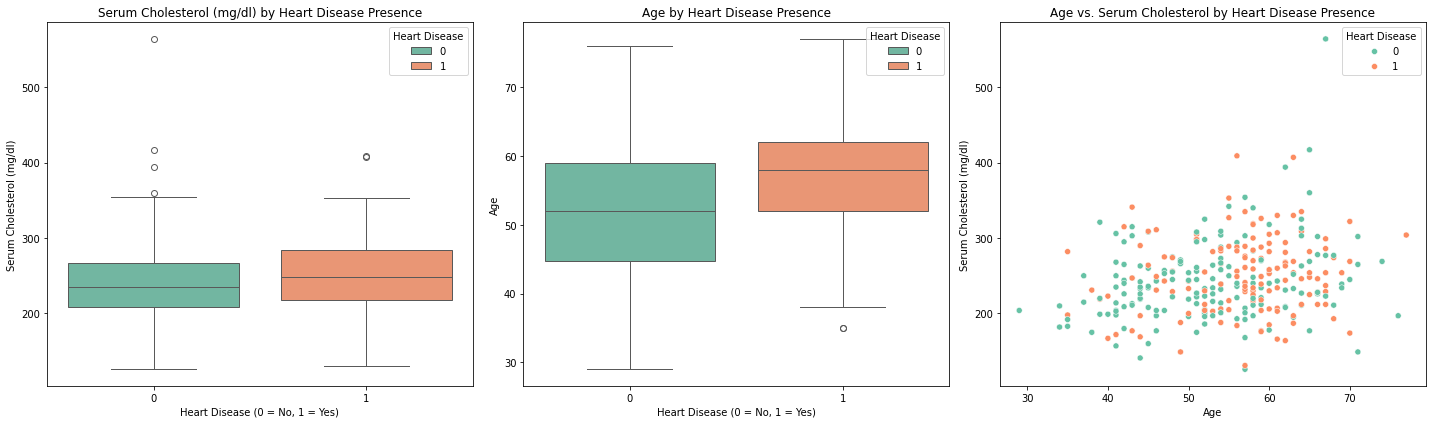

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 row, 3 columns

# Boxplot of Serum Cholesterol by Heart Disease
sns.boxplot(ax=axes[0], x='heart_disease', y='chol', data=df, hue='heart_disease', palette=color_mapping)
axes[0].set_title('Serum Cholesterol (mg/dl) by Heart Disease Presence')
axes[0].set_xlabel('Heart Disease (0 = No, 1 = Yes)')
axes[0].set_ylabel('Serum Cholesterol (mg/dl)')
axes[0].legend(title='Heart Disease', loc='upper right')

# Boxplot of Age by Heart Disease Presence
sns.boxplot(ax=axes[1], x='heart_disease', y='age', data=df, hue='heart_disease', palette=color_mapping)
axes[1].set_title('Age by Heart Disease Presence')
axes[1].set_xlabel('Heart Disease (0 = No, 1 = Yes)')
axes[1].set_ylabel('Age')
axes[1].legend(title='Heart Disease', loc='upper right')

# Scatterplot of Age vs. Serum Cholesterol, colored by Heart Disease Presence
sns.scatterplot(ax=axes[2], x='age', y='chol', hue='heart_disease', data=df, palette=color_mapping)
axes[2].set_title('Age vs. Serum Cholesterol by Heart Disease Presence')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Serum Cholesterol (mg/dl)')
axes[2].legend(title='Heart Disease', loc='upper right')

plt.tight_layout()
plt.show()

## Criticizing Dataset

Based on the exploratory plots, I do have confidence in the study however there are a few criticisms I have.

1. Unqueal numbers of males vs females - In the dataset there are 97 females and 206 males. This imbalance in the dataset could lead to biased results when comparing males and females. For example, statistical tests may have reduced power for detecting significant differences in females due to the smaller sample size. Sex imbalance may limit the generalizability of findings to the overall population.

2. Extreme outlier in Serum Cholesterol for non heart disease individual - There is a single value (shown above) for serum cholesterol that is greater than 500 mg/dl (which is the largest in the dataset). This outlier does not align with the expected trend (higher serum cholesterol being associated with heart disease) and could disproportionately influence statistical results, such as regression coefficients in the logistic model. Outliers can affect the mean, standard deviation, and scaling of variables, potentially leading to biased model predictions

3. Few individuals with age under 40 years old - Finally, there are a lack of individuals in this dataset that are younger than 40. A limited number of younger individuals creates an imbalance in age representation, reducing the ability to study age as a predictor across its full range. The relationship between age and heart disease risk might not generalize well to younger populations, limiting the external validity of the study.

# Step 4: Perform Statistical Analysis

## Hypothesis 1: Is there a significant difference in ST Depression Induced by Exercise (oldpeak) in Males vs Females?
### NULL: There is no significant difference in ST Depression Induced by Exercise (oldpeak) between males and females
### ALTERNATIVE: There is a significant difference in ST Depression Induced by Exercise (oldpeak) between males and females

Assumptions

In order to perform this statistical test the first important step is to assess normality. As shown above, the histogram for ST depression induced by exercise is heavily right-skewed, with most values being between 0 and 1. Based on this histogram alone it is clear that this data violates the assumptions of normality however the QQ plot below confirms that the data does not follow a normal distribution.

Since normality is violated, a non-parametric test will be used. I will use the Rank-sum (Mann-Whitney U Test) non-parametric test to assess the hypothesis.

<Figure size 576x432 with 0 Axes>

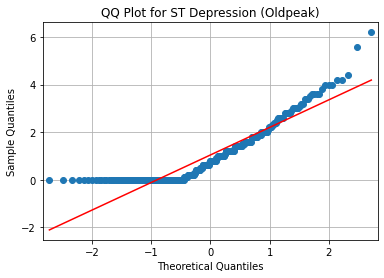

In [124]:
# Assess normailty with QQ plot for Oldpeak
plt.figure(figsize=(8, 6))
sm.qqplot(df['oldpeak'], line='s') 
plt.title("QQ Plot for ST Depression (Oldpeak)")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

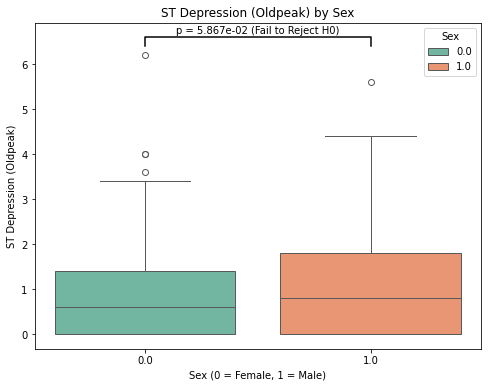

In [125]:
color_mapping = {0: '#66c2a5', 1: '#fc8d62'}  # Two colors for binary categories

# Perform Mann-Whitney U Test
group_female = df[df['sex'] == 0]['oldpeak']
group_male = df[df['sex'] == 1]['oldpeak']

stat, p_value = mannwhitneyu(group_female, group_male, alternative='two-sided')

# Set significance 
alpha = 0.05
reject_null = p_value < alpha # check

# Plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='sex', y='oldpeak', data=df, hue='sex', palette=color_mapping)
plt.title('ST Depression (Oldpeak) by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('ST Depression (Oldpeak)')
plt.legend(title='Sex')

# Add statistical annotation
x1, x2 = 0, 1  # Positions of the groups on x-axis
y, h = df['oldpeak'].max() + 0.2, 0.2  # Height of the line and space above the max value
plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, color='black')  # Add horizontal line
result_text = f'p = {p_value:.3e} {"(Reject H0)" if reject_null else "(Fail to Reject H0)"}'
plt.text((x1 + x2) * 0.5, y + h + 0.05, result_text, ha='center', va='bottom', fontsize=10, color='black')  # Add p-value text

plt.show()

## Results of Hypothesis 1

Chosen significance level = 0.05  
P-value = 0.05867  
Outcome of Test = Fail to reject null hypothesis (0.05867 > 0.05). There is no sufficient evidence to conclude that there is a significant difference in ST depression induced by exercise between males and females

The result implies that sex alone may not play a major role in influencing ST depression induced by exercise. This suggests that other factors, such as age, fitness level, underlying coronary artery disease, or hormonal influences, may be contributing to exercise-induced changes in the ST segment.

Limitations  
- The dataset contains more males than females, which might affect the power of the test. A larger, more balanced sample might provide stronger evidence
- A heavily right-skewed distribution for ST depression induced by exercise could affect the interpretability of results, even with non-parametric testing

Future Directions  
- Investigate other potential predictors (e.g., age, heart rate) to better understand the variability in ST depression induced by exercise
- Collect additional data with a more balanced representation of males and females for more robust comparisons

## Hypothesis 2: Can age and serum cholesterol predict the presence of heart disease?

To test this hypothesis, I will build a logistic regression classifier (with built-in cross validation using a 5-fold cross validation). This will classify heart disease (1) vs. no heart disease (0) based on the scaled features (serum cholesterol and Age). 

Assumptions  
Class Imbalance - Based on the plots above in the exploratory analysis, I don’t believe a class imbalance is apparent here. There are 164 individuals without heart disease (0) and 139 individuals with heart disease (1). The proportion of the two classes is relatively balanced, with approximately 54% of individuals in the majority class and 46% in the minority class. Therefore, no additional techniques like resampling or class weighting are necessary to address class imbalance for this analysis

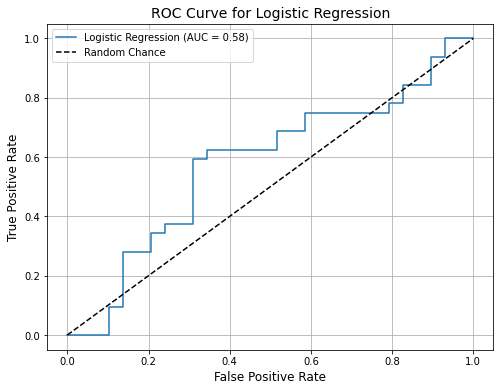

Logistic Regression AUC: 0.58


In [119]:
# Recode 'goal' into binary heart disease presence (0 = No Heart Disease, 1 = Heart Disease Present)
df['heart_disease'] = df['goal'].apply(lambda x: 0 if x == 0 else 1)

# 1: Select relevant features and scale them
X = df[['chol', 'age']]  # Predictor variables
y = df['heart_disease']  # Target variable

# Scale the predictors
X_scaled = pd.DataFrame(scale(X), columns=X.columns)

# 2: Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 3: Logistic Regression with cross-validation
logistic_model = LogisticRegressionCV(cv=5, random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

# 4: Calculate and plot ROC curve
# Predict probabilities for the test set
logistic_probs = logistic_model.predict_proba(X_test)[:, 1]

# Compute AUC score
logistic_auc = roc_auc_score(y_test, logistic_probs)

# Compute ROC curve
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.title('ROC Curve for Logistic Regression', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

print(f"Logistic Regression AUC: {logistic_auc:.2f}")

## Results of Hypothesis 2

AUC score = 0.58

The Area Under the ROC Curve (AUC) for the logistic regression classifier is 0.58, which is only slightly better than random guessing (AUC = 0.50). This indicates that the model has poor discriminatory ability to differentiate between individuals with and without heart disease based on the predictors age and serum cholesterol.

LIMITATIONS

- AGE: Age alone may not fully capture the complexity of cardiovascular risk, as it is often an indirect marker of cumulative exposure to other risk factors (e.g., smoking, high cholesterol, physical inactivity)

- SERUM CHOLESTEROL: Some individuals with high cholesterol do not develop heart disease due to protective factors such as high HDL levels and genetics. Conversely, some individuals with low cholesterol levels may still develop heart disease due to other risk factors like inflammation, smoking, and diabetes.

- The model only uses age and serum cholesterol as predictors, ignoring other critical risk factors such as blood pressure, smoking status, diabetes, family history, and physical activity. These missing variables likely contain important information that could significantly improve predictive performance.

FUTURE DIRECTIONS

- Future models should include other important risk factors such as blood pressure, smoking status, diabetes status, etc...
- Use more flexible models like Random Forests, Gradient Boosting, or Neural Networks, which can capture non-linear relationships and interactions between variables
- Collecting data from a more diverse cohort could improve the model’s generalizability
